In [1]:
import pandas as pd 
import numpy as np 

import matplotlib
import matplotlib.pyplot as plt 
#%matplotlib inline 
#%config InlineBackend.figure_format = 'svg'
plt.style.use('ggplot') 
import plotly.graph_objects as go 
import seaborn as sns 

import re # for cleaning contact data

from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

from sklearn.cluster import KMeans 
from yellowbrick.cluster import KElbowVisualizer 

import scipy.stats as stats


In [2]:
behaviors = pd.read_csv("C:/Users/VanDoan/OneDrive - Rightpoint/Analysis/cpa-customers.csv")
behaviors.head()

,customer_id,total_sessions_app,total_sessions_web,email_comm,sms_comm,ivr_calls,csr_calls,annual_reports,account_age
0,1,0,3,0,16,1,0,148,20.354839
1,2,0,8,0,3,3,4,477,75.225806
2,3,4,3,0,13,6,4,147,231.677419
3,4,1,0,5,19,2,0,118,140.774194
4,5,0,43,1,0,1,0,239,232.903226


## I. Cleaning and EDA

### 2. Exploratory data analysis

In [3]:
features = ['total_sessions_app', 
 'total_sessions_web',
 'email_comm',
 'sms_comm',
 'ivr_calls',
 'csr_calls',
 'annual_reports']

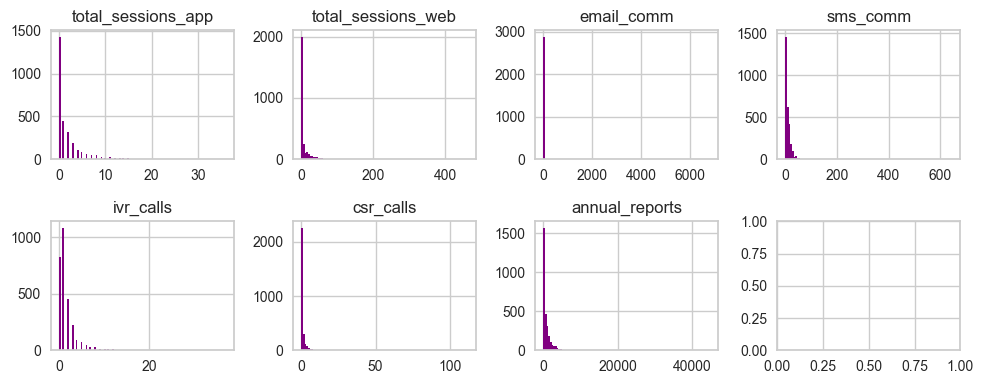

In [4]:
fig, axes = plt.subplots(2,4, figsize = (10,4))

for feature, ax in zip(features, axes.ravel()):
    ax.hist(behaviors[feature], bins=100, color='purple')
    ax.set_title(feature)

plt.tight_layout() # avoid overlapping

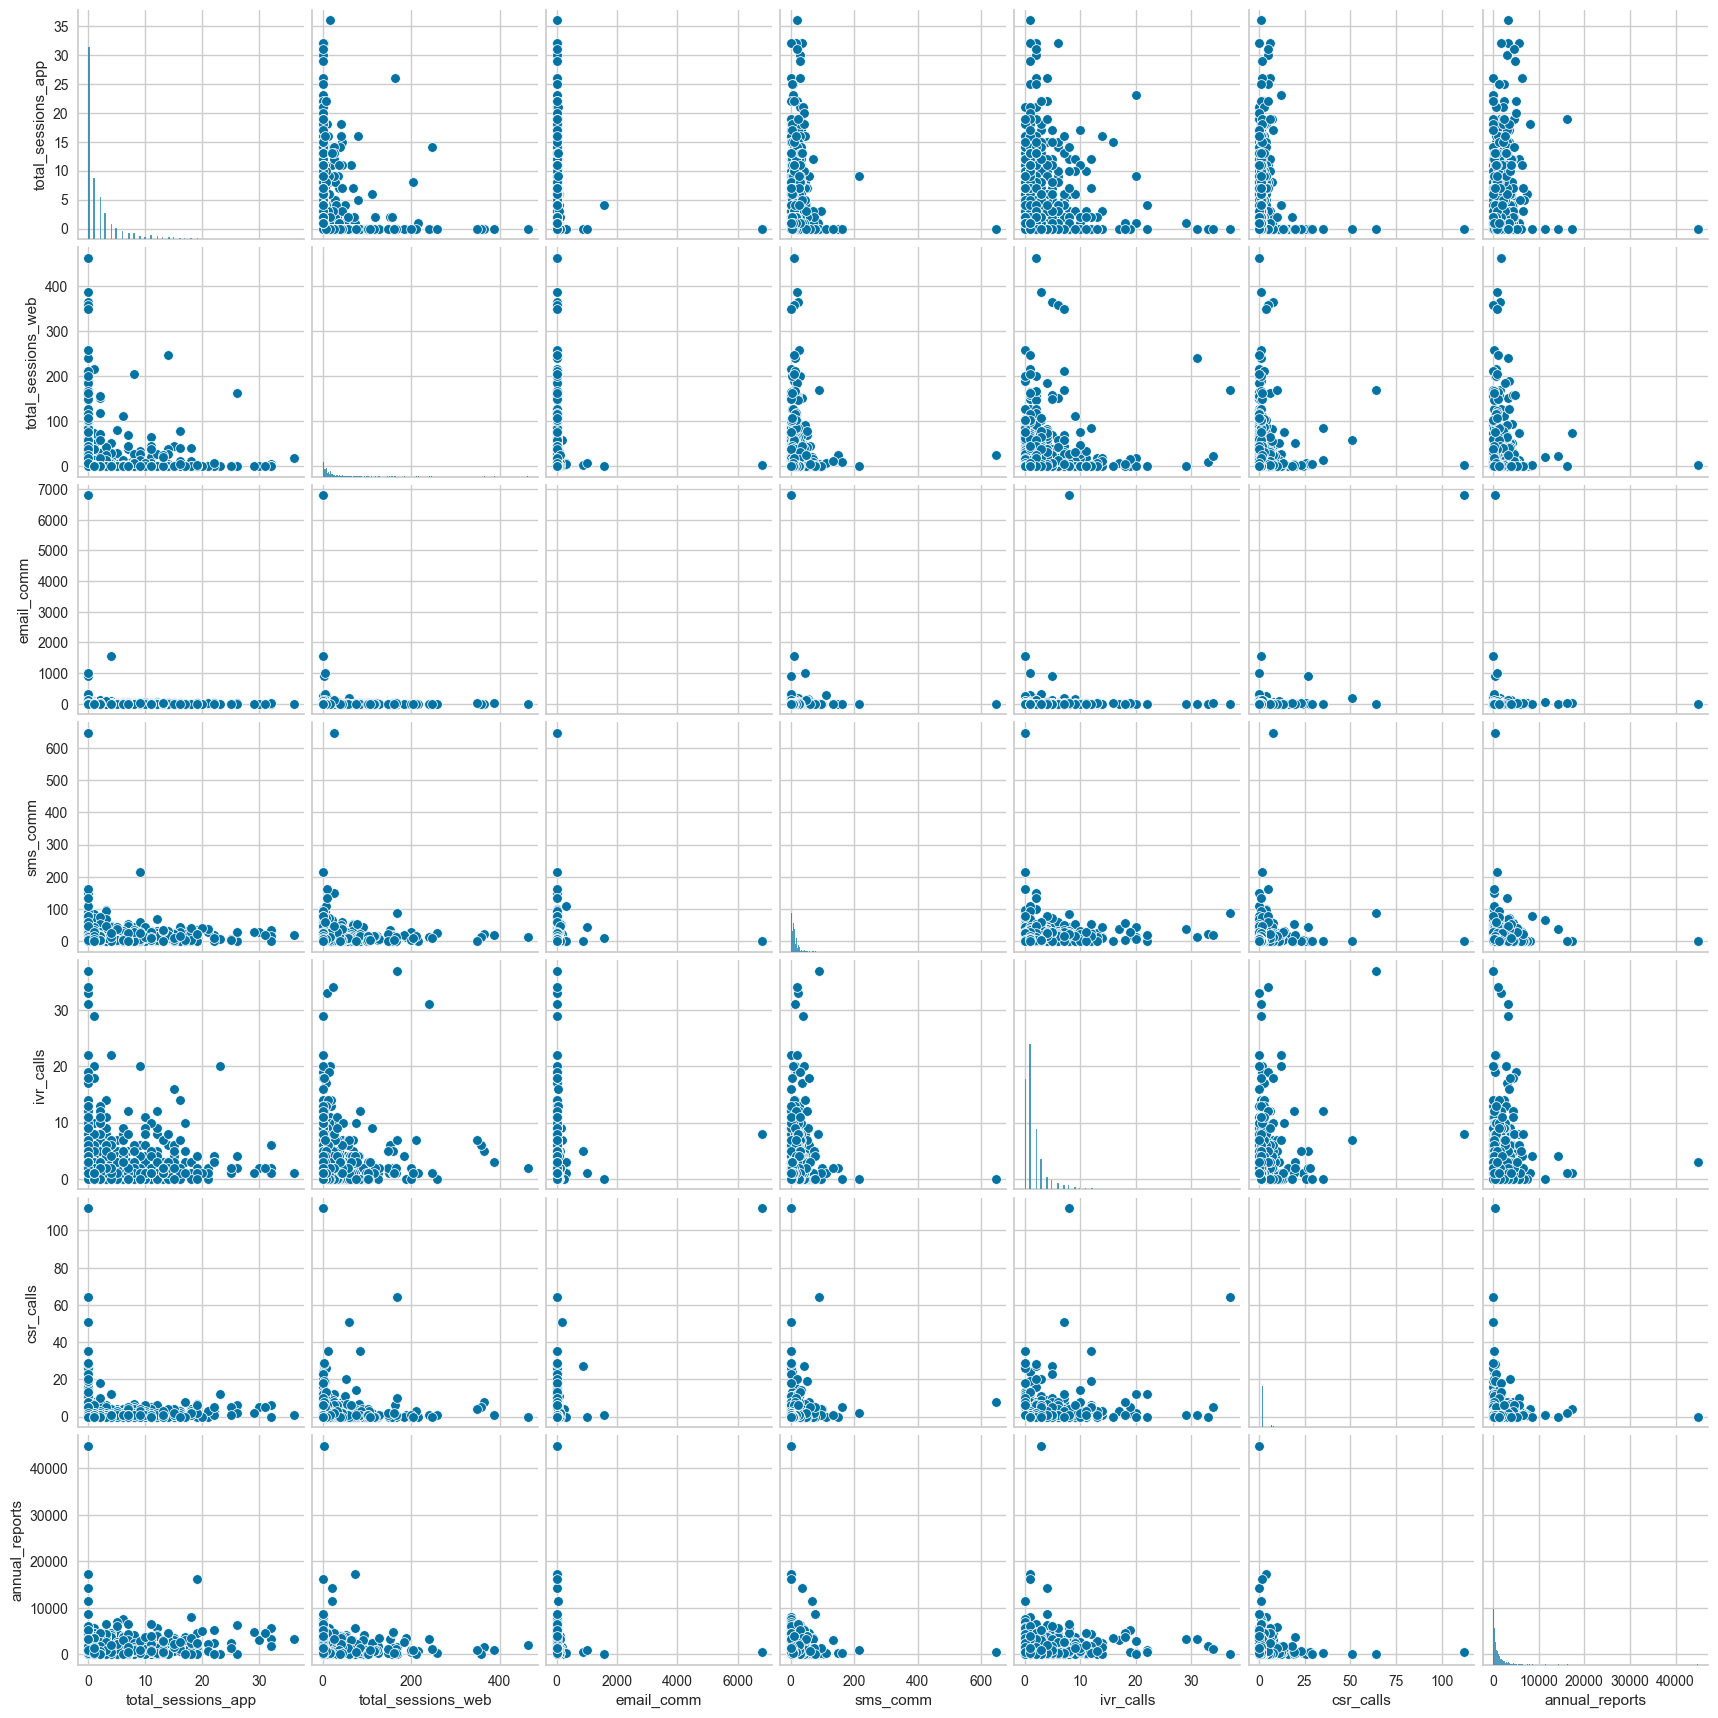

In [35]:
sns.pairplot(behaviors, vars=features)

## Standardization

In [6]:
behaviors_np = behaviors[features].to_numpy() 

behaviors_np.shape

(2914, 7)

In [7]:
# standard scaling data for better PCA performance
scaler = StandardScaler()
behaviors_np = scaler.fit_transform(behaviors_np)

behaviors_np[:, 0].std()

1.0

## II. Principal Component Analysis

### PCA

In [8]:
pca = PCA(n_components=2)
behaviors_2_result = pca.fit_transform(behaviors_np)

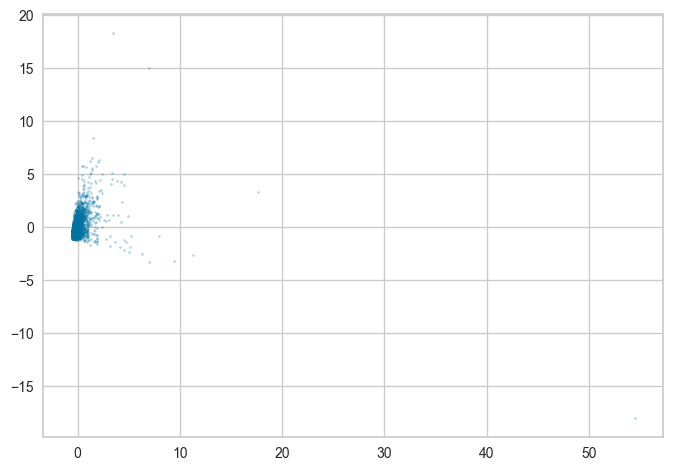

In [9]:
plt.scatter(behaviors_2_result[:,0], behaviors_2_result[:,1], s=2, alpha=0.3)

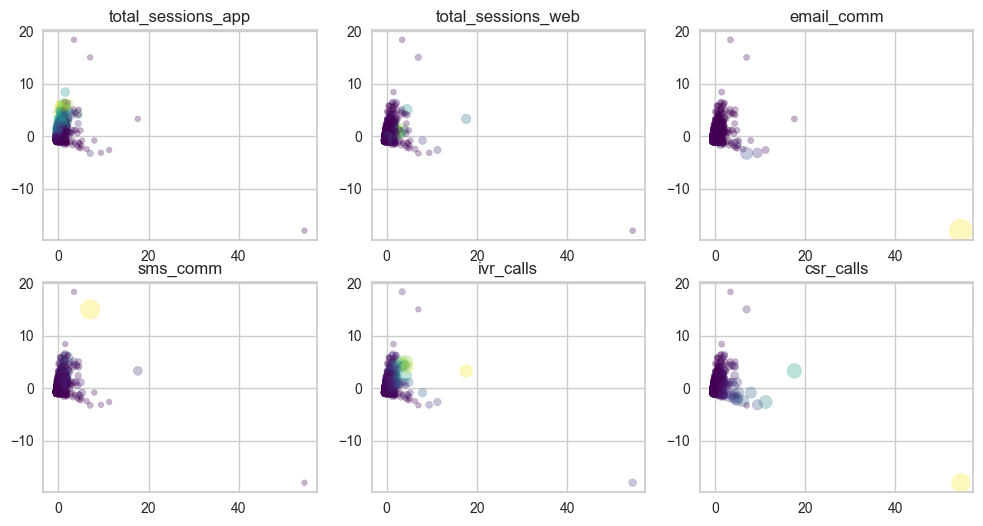

In [10]:
fig, axes = plt.subplots(2, 3, figsize = (12,6))
for feature, ax in zip(features, axes.ravel()):
    cmap = 'viridis'
    size = 20 + 5* behaviors_np[:, features.index(feature)]
    color = behaviors[feature]
    ax.scatter(behaviors_2_result[:,0], behaviors_2_result[:,1], c=color, s= size, cmap=cmap, alpha=0.3)
    ax.set_title(feature)

### Kernel PCA

#### Polymonial function

In [11]:
kpca = KernelPCA(n_components=2, kernel='poly', degree=2)

behaviors_result_poly = kpca.fit_transform(behaviors_np)


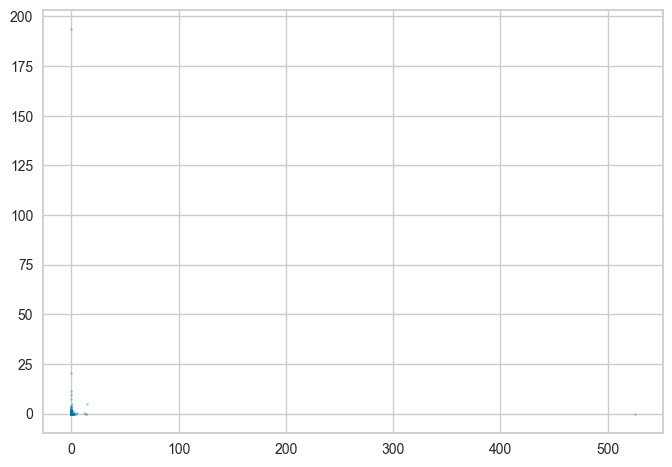

In [12]:
plt.scatter(behaviors_result_poly[:,0], behaviors_result_poly[:,1], s=2, alpha=0.3)

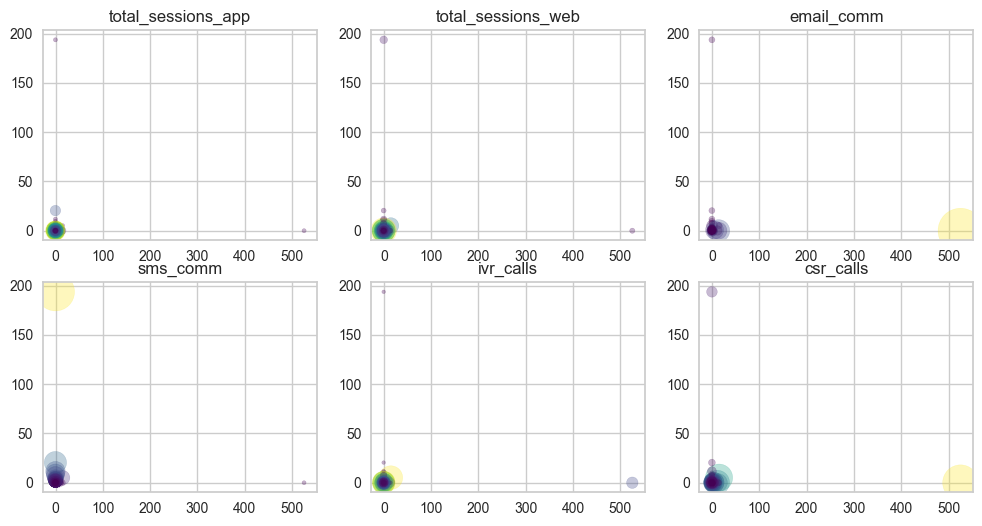

In [13]:
fig, axes = plt.subplots(2, 3, figsize = (12, 6))
for feature, ax in zip(features, axes.ravel()):
    cmap = 'viridis'
    size = 20 + 20* behaviors_np[:, features.index(feature)]
    color = behaviors[feature]
    ax.scatter(behaviors_result_poly[:,0], behaviors_result_poly[:,1], c=color, s= size, cmap=cmap, alpha=0.3)
    ax.set_title(feature)

#### Radial Basis Function

In [14]:
kpca = KernelPCA(n_components=2, kernel='rbf', gamma= 0.01)

behaviors_result_rbf = kpca.fit_transform(behaviors_np)

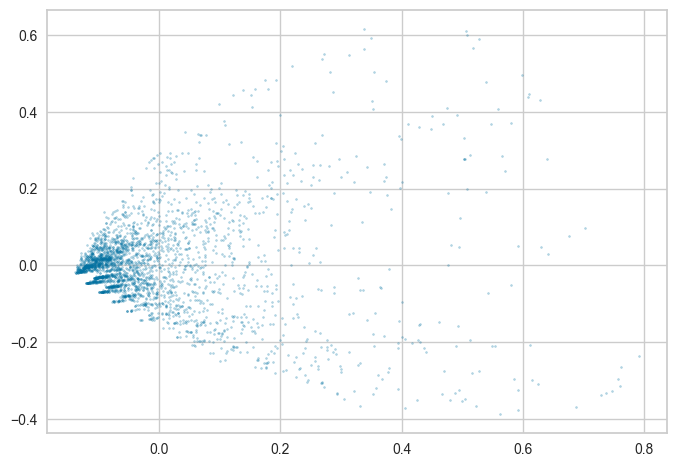

In [15]:
plt.scatter(behaviors_result_rbf[:,0], behaviors_result_rbf[:,1], s=2, alpha=0.3)

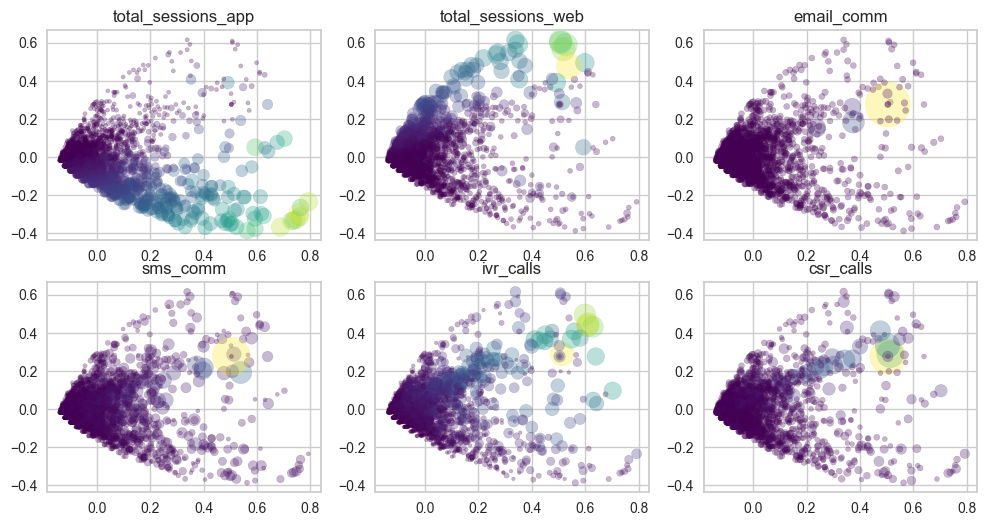

In [16]:
fig, axes = plt.subplots(2, 3, figsize = (12, 6))
for feature, ax in zip(features, axes.ravel()):
    cmap = 'viridis'
    size = 20 + 20* behaviors_np[:, features.index(feature)]
    color = behaviors[feature]
    ax.scatter(behaviors_result_rbf[:,0], behaviors_result_rbf[:,1], c=color, s= size, cmap=cmap, alpha=0.3)
    ax.set_title(feature)

#### Cosine function

In [17]:
kpca = KernelPCA(n_components=2, kernel='cosine')
behaviors_result_cos = kpca.fit_transform(behaviors_np)

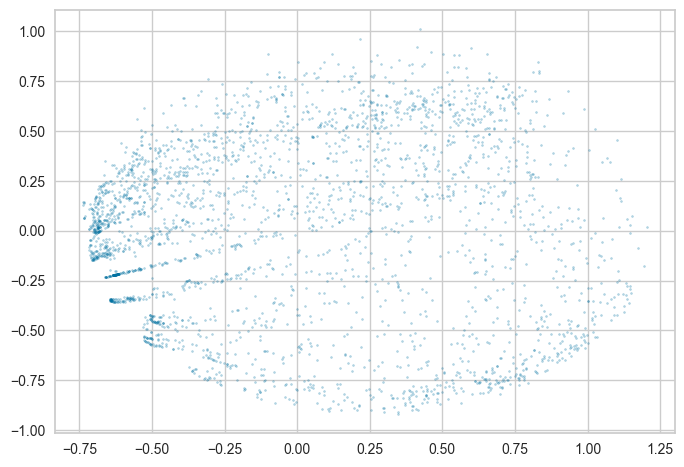

In [18]:
plt.scatter(behaviors_result_cos[:,0], behaviors_result_cos[:,1], s=2, alpha=0.3)

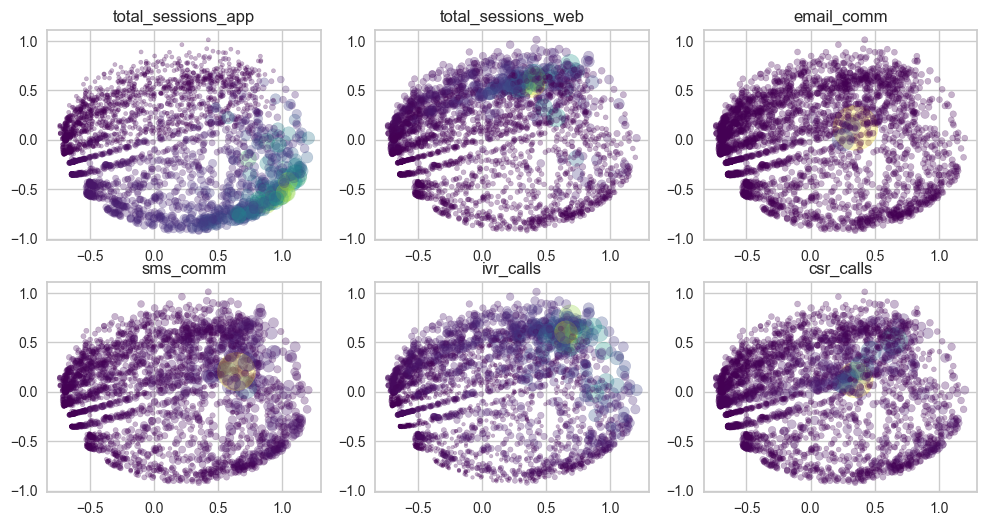

In [19]:
fig, axes = plt.subplots(2, 3, figsize = (12, 6))
for feature, ax in zip(features, axes.ravel()):
    cmap = 'viridis'
    size = 20 + 20* behaviors_np[:, features.index(feature)]
    color = behaviors[feature]
    ax.scatter(behaviors_result_cos[:,0], behaviors_result_cos[:,1], c=color, s= size, cmap=cmap, alpha=0.3)
    ax.set_title(feature)

#### Sigmoid function

In [20]:
kpca = KernelPCA(n_components=2, kernel='sigmoid', gamma=0.01, degree=2)

behaviors_result_sig = kpca.fit_transform(behaviors_np)

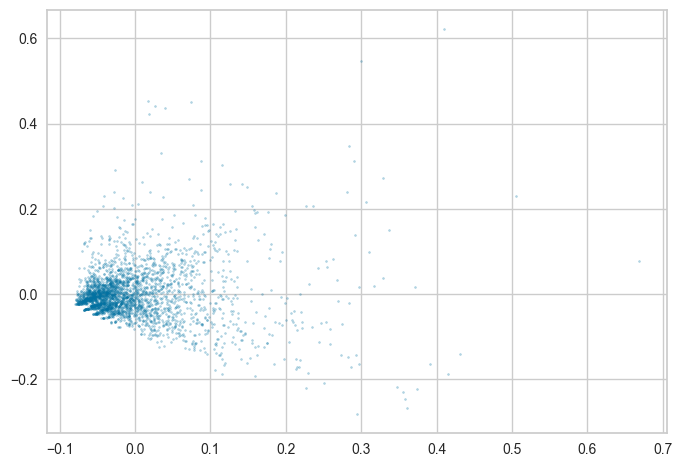

In [21]:
plt.scatter(behaviors_result_sig[:,0], behaviors_result_sig[:,1], s=2, alpha=0.3)

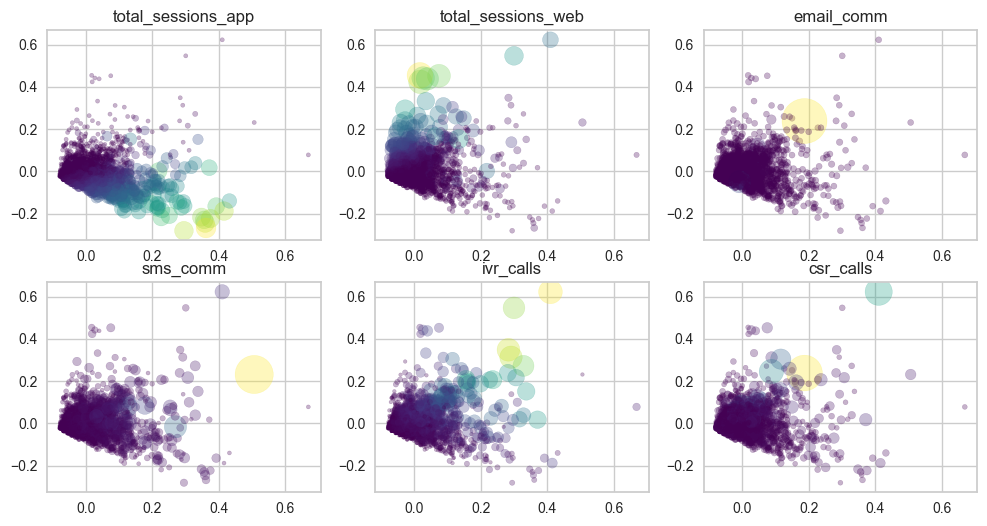

In [22]:
fig, axes = plt.subplots(2, 3, figsize = (12, 6))
for feature, ax in zip(features, axes.ravel()):
    cmap = 'viridis'
    size = 20 + 20* behaviors_np[:, features.index(feature)]
    color = behaviors[feature]
    ax.scatter(behaviors_result_sig[:,0], behaviors_result_sig[:,1], c=color, s= size, cmap=cmap, alpha=0.3)
    ax.set_title(feature)

## Customer segmentation

In [23]:
# clustering with KMeans
clusterer = KMeans(n_clusters=2, n_init = 20, max_iter=500, random_state=123)
clusters = clusterer.fit_predict(behaviors_result_rbf)

In [24]:
markers = list('*hH+xXDd|.,ov^<>12348spP')

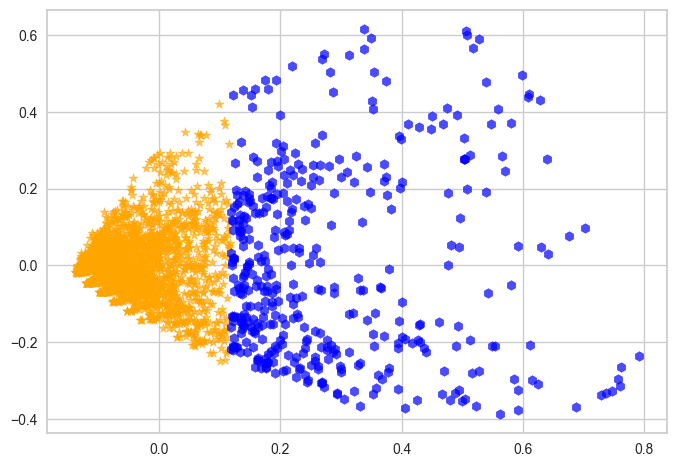

In [25]:
cluster_colors = ['orange', 'blue', 'green']
for cluster in np.unique(clusters):
    cluster_data = behaviors_result_rbf[clusters==cluster]
    plt.scatter(cluster_data[:,0], cluster_data[:,1], alpha=0.7, marker=markers[cluster], color=cluster_colors[cluster])

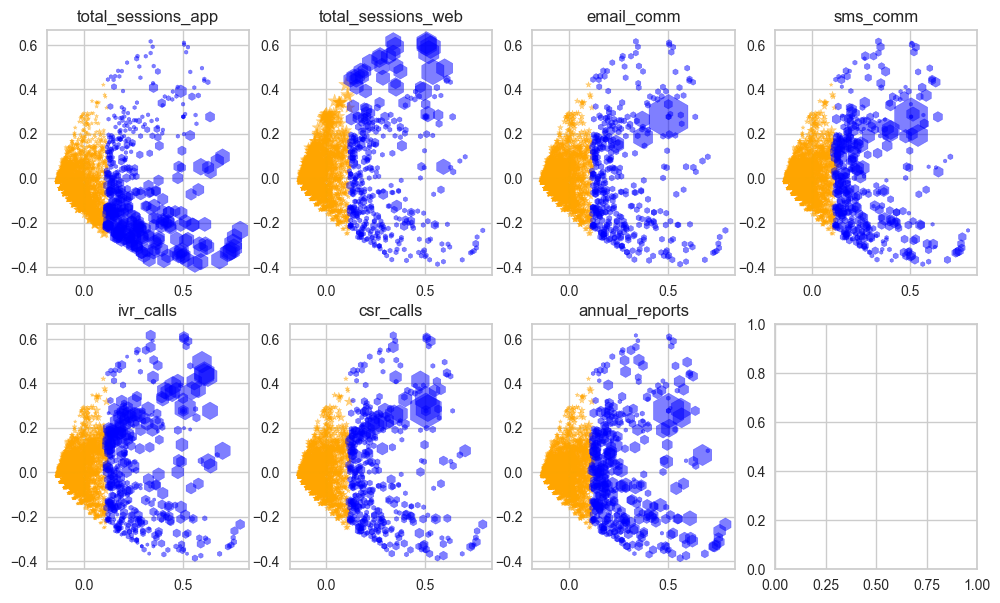

In [26]:
fig, axes = plt.subplots(2, 4, figsize = (12, 7))
cluster_colors = ['orange', 'blue', 'green']
for feature, ax in zip(features, axes.ravel()):
    
    for cluster in np.unique(clusters):
        cluster_data = behaviors_result_rbf[clusters == cluster]
        size = 20 + 20* behaviors_np[:, features.index(feature)][clusters == cluster]
        ax.scatter(cluster_data[:,0], cluster_data[:,1], s=size, color=cluster_colors[cluster], alpha=0.5, marker=markers[cluster])
    ax.set_title(feature)

### Elbow analysis for K-Means

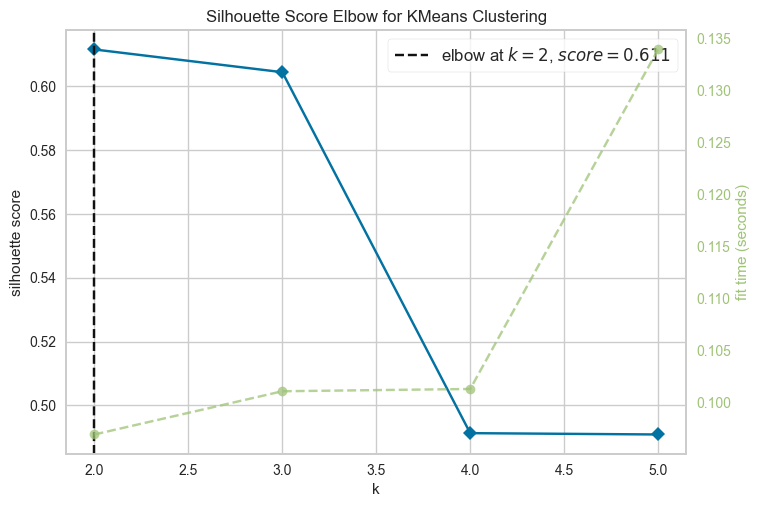

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [27]:
# Elbow viz
viz = KElbowVisualizer(clusterer, k=(2,6), metric='silhouette')
viz.fit(behaviors_result_rbf)

viz.show()

In [28]:
behaviors['cluster'] = clusters

In [29]:

data = behaviors[features + ['cluster']]


In [30]:
data.groupby('cluster')[features].mean()

,total_sessions_app,total_sessions_web,email_comm,sms_comm,ivr_calls,csr_calls,annual_reports
cluster,,,,,,,
0,1.217234,8.115030,4.476954,7.972745,1.284569,0.983166,598.764329
1,6.947494,22.899761,32.021480,22.613365,4.236277,2.957041,2212.272076


In [31]:
data.groupby('cluster')[features].count()

,total_sessions_app,total_sessions_web,email_comm,sms_comm,ivr_calls,csr_calls,annual_reports
cluster,,,,,,,
0,2495,2495,2495,2495,2495,2495,2495
1,419,419,419,419,419,419,419


In [47]:
data_normalized = data.copy(deep=True).astype('float64')
data_normalized.loc[:, features] = behaviors_np
data_normalized['cluster'] = clusters

# data_normalized[features] /= data_normalized[features].max()


In [33]:
# Kernel PCA Sigmoid function
fig = go.Figure()

for cluster in np.unique(clusters):
    radius = data_normalized.loc[data_normalized.cluster == cluster, features].mean() #/ data_normalized.loc[data_normalized.cluster == cluster, features].mean().max()
    thetas = features 
    actual_val = data.loc[data_normalized.cluster == cluster, features].mean()
    cluster_size = len(data[data.cluster == cluster])
    colors = ['orange', 'blue']
    fig.add_trace(
        go.Scatterpolar(r=radius, theta=thetas, mode='lines', name=f'Cluster {cluster}', text=[f'Mean value: {x}' for x in actual_val],
                        opacity=np.max([0.8, cluster_size / len(data[data.cluster == 0])]),
                        line=dict(width=np.max([1, 3*cluster_size / len(data[data.cluster == 0])]), color=colors[cluster])
                        )
        )

fig.update_layout(title='Customer Segmentation based on behavior', width=800, autosize=False,
                  polar=dict(
                        radialaxis=dict(
                            showticklabels=False  # remove radius label on radar
        )
    )
) #autosize false to not override variables
fig.show()